In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
import sys
%load_ext autoreload
%autoreload 2
sys.path.insert(1,'../code')
sys.path.insert(1,'../data')
from params import args_nhis
from sklearn.model_selection import train_test_split
from models import model
pd.options.mode.chained_assignment = None
from matplotlib import pyplot as plt
import seaborn as sns
import lightgbm as lgb
from calculate import wte

In [2]:
df_all = pd.read_csv('../data/dataClean.csv')

/Users/sjeong/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (2,5,6,11,14,15,16,17,18,19,20,21,22,23,24,25,26,27,29,32,33,36,38,39,41,42,44,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,26

In [3]:
df = {}
for y in range(2008,2019):
    df[y] = df_all[df_all.year==y]
    print(y, df[y].shape)

2008 (74236, 1131)
2009 (88446, 1131)
2010 (89976, 1131)
2011 (101875, 1131)
2012 (108131, 1131)
2013 (104520, 1131)
2014 (112053, 1131)
2015 (103789, 1131)
2016 (97169, 1131)
2017 (78132, 1131)
2018 (72831, 1131)


In [7]:
X = args_nhis['x']
for y in range(2008,2019):
    print(y)
    for v in args_nhis['x']:
        if df[y][v].isna().any():
            print(v, df[y][df[y][v].isna()==True].shape[0]/df[y].shape[0])
            if df[y][v].dtype=='bool':
                df[y].loc[df[y][v].isna()==True,v]=False
            else:
                df[y].loc[df[y][v].isna()==True,v]=0

2008
2009
overnight_hospital_times 0.9216358003753703
overnight_hospital_nights 0.9216358003753703
care_athome_2wks_times 0.9915993939805079
care_phone_2wks_times 0.9581891775772788
hino_months 0.9602469303303711
wrkhrs 0.5548583316373833
wrk_mo_lastyr 0.5076996133233838
2010
overnight_hospital_times 0.9239019294033964
overnight_hospital_nights 0.9239019294033964
care_athome_2wks_times 0.9903307548679647
care_phone_2wks_times 0.959033520049791
hino_months 0.960856228327554
wrkhrs 0.5581266115408553
wrk_mo_lastyr 0.5232061883168845
2011
overnight_hospital_times 0.9225815950920245
overnight_hospital_nights 0.9225815950920245
care_athome_2wks_times 0.9901055214723926
care_phone_2wks_times 0.9579092024539877
hino_months 0.9586355828220859
wrkhrs 0.5568883435582822
wrk_mo_lastyr 0.5238478527607362
2012
overnight_hospital_times 0.9243047784631604
overnight_hospital_nights 0.9243047784631604
care_athome_2wks_times 0.9901878277274787
care_phone_2wks_times 0.9588832064810277
hino_months 0.96076

In [8]:
# eligibility restriction
for yr in range(2008,2019):
    df[yr]['meligible'] = 1
    df[yr].loc[df_all['ernyr_p'].str[0:2].isin(['10','11'])==True,'meligible'] = 0
    df[yr].meligible.value_counts()

In [9]:
df[2009].meligible.value_counts()

1    82993
0     5453
Name: meligible, dtype: int64

In [10]:
len(X)

396

[LightGBM] [Info] [cross_entropy:Init]: (objective) labels passed interval [0, 1] check
[LightGBM] [Info] [cross_entropy:Init]: (metric) labels passed interval [0, 1] check
[LightGBM] [Info] [cross_entropy:Init]: sum-of-weights = 12413.000000
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.097882 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 12413, number of used features: 305
[LightGBM] [Info] [cross_entropy:BoostFromScore]: pavg = 0.145654 -> initscore = -1.769104
[LightGBM] [Info] Start training from score -1.769104
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

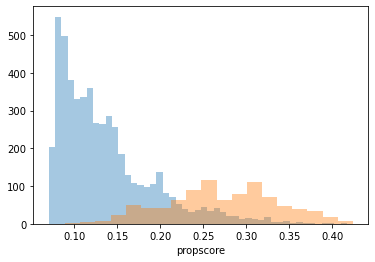

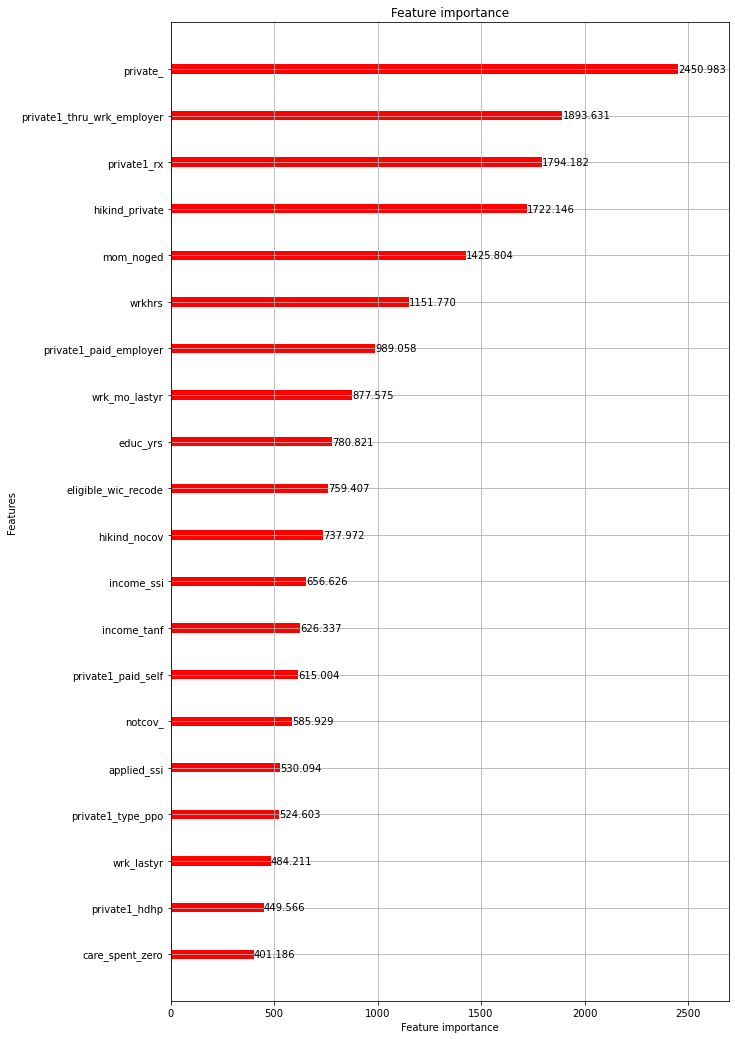

0.16764203016685314
0.008779680371130002
split:  1
[ 0.29857898  0.03619398 -0.04808629 ...  0.6329892   0.08523773
  0.06259425] [ 0.00300748  0.2554694  -0.03667788 ...  0.01235696  0.03843071
 -0.0150333 ]
mu trained and predicted
[LightGBM] [Info] [cross_entropy:Init]: (objective) labels passed interval [0, 1] check
[LightGBM] [Info] [cross_entropy:Init]: (metric) labels passed interval [0, 1] check
[LightGBM] [Info] [cross_entropy:Init]: sum-of-weights = 13171.000000
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.096260 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 13171, number of used features: 307
[LightGBM] [Info] [cross_entropy:BoostFromScore]: pavg = 0.135297 -> initscore = -1.854912
[LightGBM] [Info] Start training from score -1.854912
[LightGBM] [Warning] N

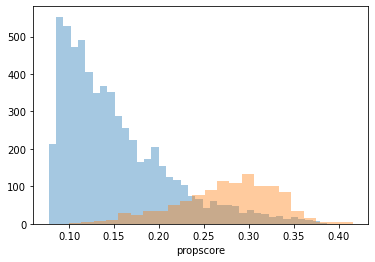

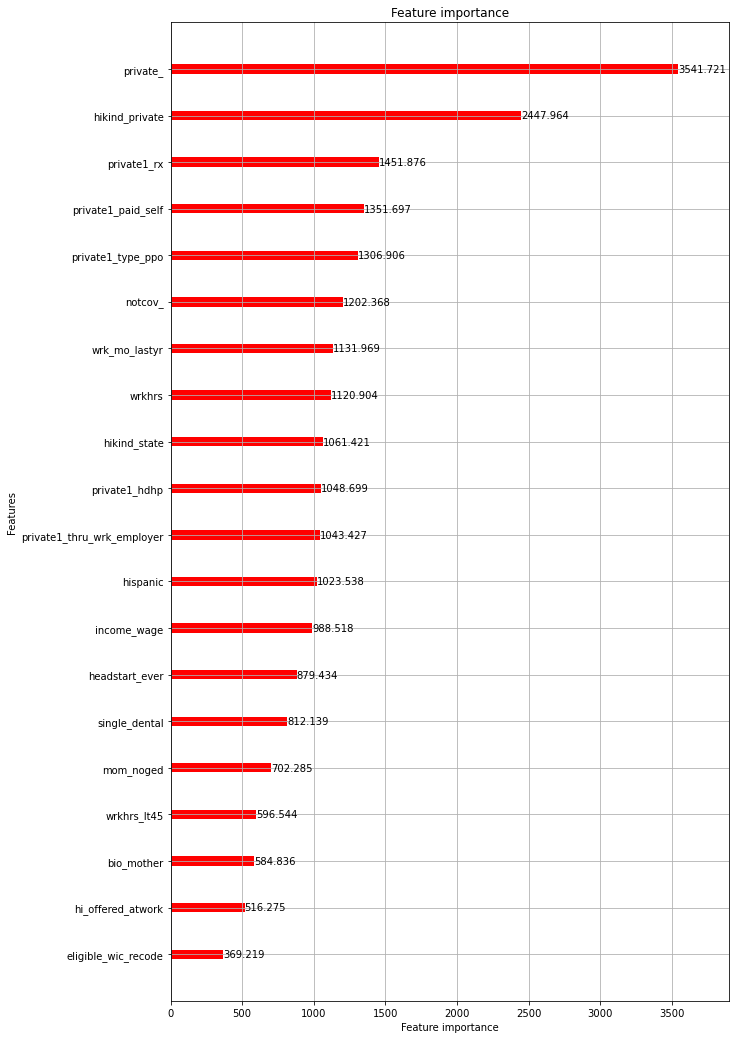

0.015136825342084893
0.008074548760427997
split:  1
[0.11701126 0.26155865 0.25773388 ... 0.6719021  0.20281994 0.04836479] [0.6021807  0.1028225  0.22269367 ... 0.35229334 0.33621114 0.7872567 ]
mu trained and predicted
[LightGBM] [Info] [cross_entropy:Init]: (objective) labels passed interval [0, 1] check
[LightGBM] [Info] [cross_entropy:Init]: (metric) labels passed interval [0, 1] check
[LightGBM] [Info] [cross_entropy:Init]: sum-of-weights = 15734.000000
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.101914 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 798
[LightGBM] [Info] Number of data points in the train set: 15734, number of used features: 318
[LightGBM] [Info] [cross_entropy:BoostFromScore]: pavg = 0.148151 -> initscore = -1.749181
[LightGBM] [Info] Start training from score -1.749181
[LightGBM] [Warning] No further spl

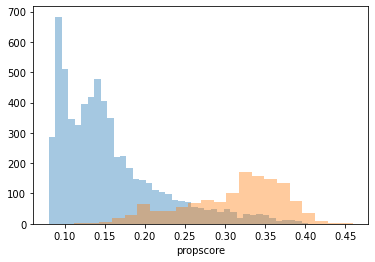

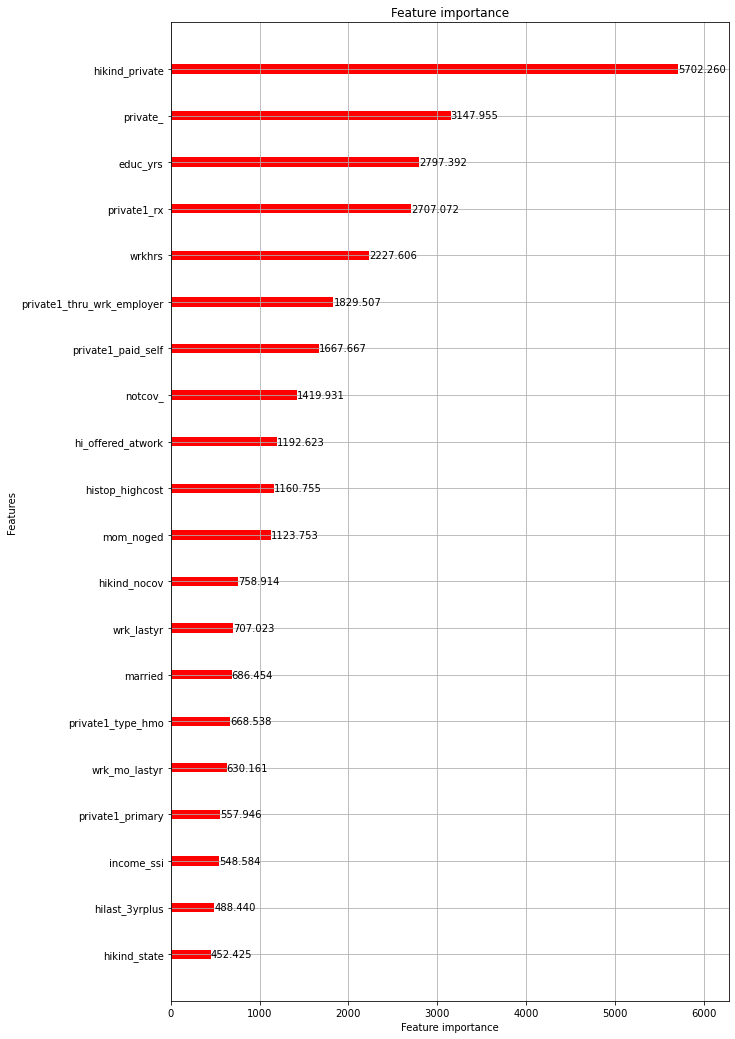

0.022150277303146986
0.007341420551135427
split:  1
[ 0.08601069  0.04530377  0.776984   ... -0.0819475   0.17480333
  0.16194005] [0.00784436 0.06927112 0.6685782  ... 0.13475513 0.3268289  0.39141214]
mu trained and predicted
[LightGBM] [Info] [cross_entropy:Init]: (objective) labels passed interval [0, 1] check
[LightGBM] [Info] [cross_entropy:Init]: (metric) labels passed interval [0, 1] check
[LightGBM] [Info] [cross_entropy:Init]: sum-of-weights = 16571.000000
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.108506 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 819
[LightGBM] [Info] Number of data points in the train set: 16571, number of used features: 323
[LightGBM] [Info] [cross_entropy:BoostFromScore]: pavg = 0.154728 -> initscore = -1.697989
[LightGBM] [Info] Start training from score -1.697989
[LightGBM] [Warning] No furt

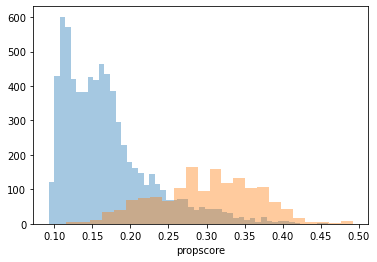

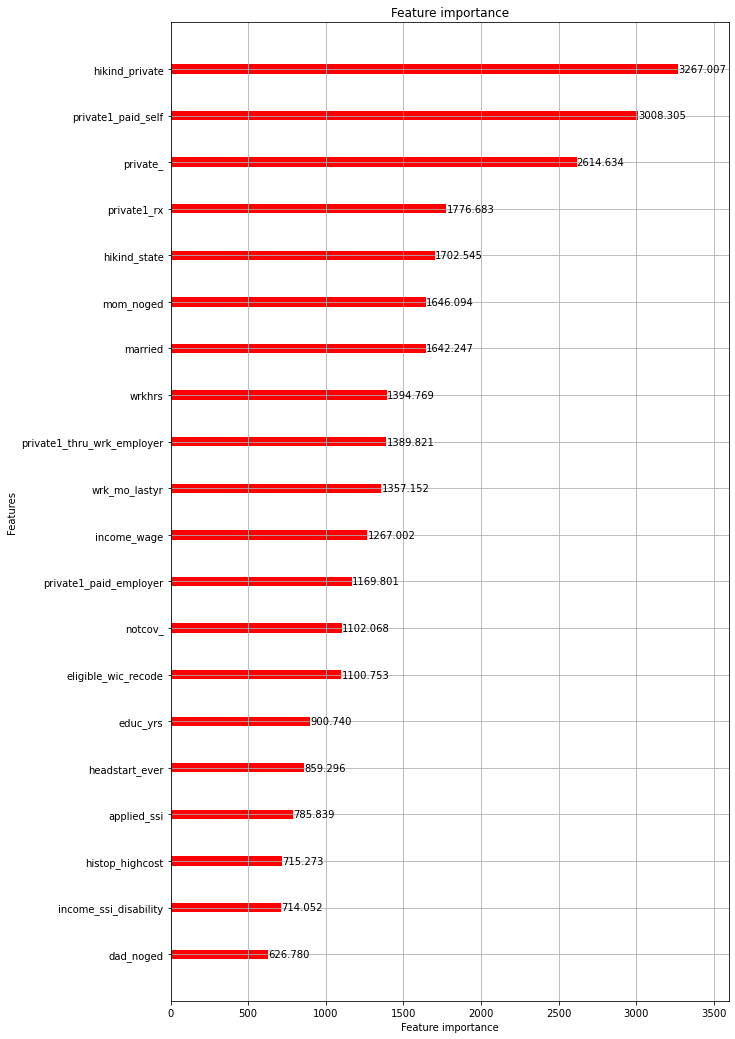

0.03737998045485378
0.007332779423152386
split:  1
[ 0.20230916 -0.07580405  0.30141008 ...  0.33622015  0.24410738
  0.18614043] [-0.04120288  0.34154296 -0.04670081 ... -0.0194273  -0.07209581
  0.12052051]
mu trained and predicted
[LightGBM] [Info] [cross_entropy:Init]: (objective) labels passed interval [0, 1] check
[LightGBM] [Info] [cross_entropy:Init]: (metric) labels passed interval [0, 1] check
[LightGBM] [Info] [cross_entropy:Init]: sum-of-weights = 18934.000000
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.113696 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 828
[LightGBM] [Info] Number of data points in the train set: 18934, number of used features: 325
[LightGBM] [Info] [cross_entropy:BoostFromScore]: pavg = 0.168005 -> initscore = -1.599835
[LightGBM] [Info] Start training from score -1.599835
[LightGBM] [Warning] N

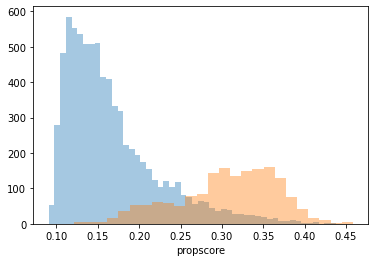

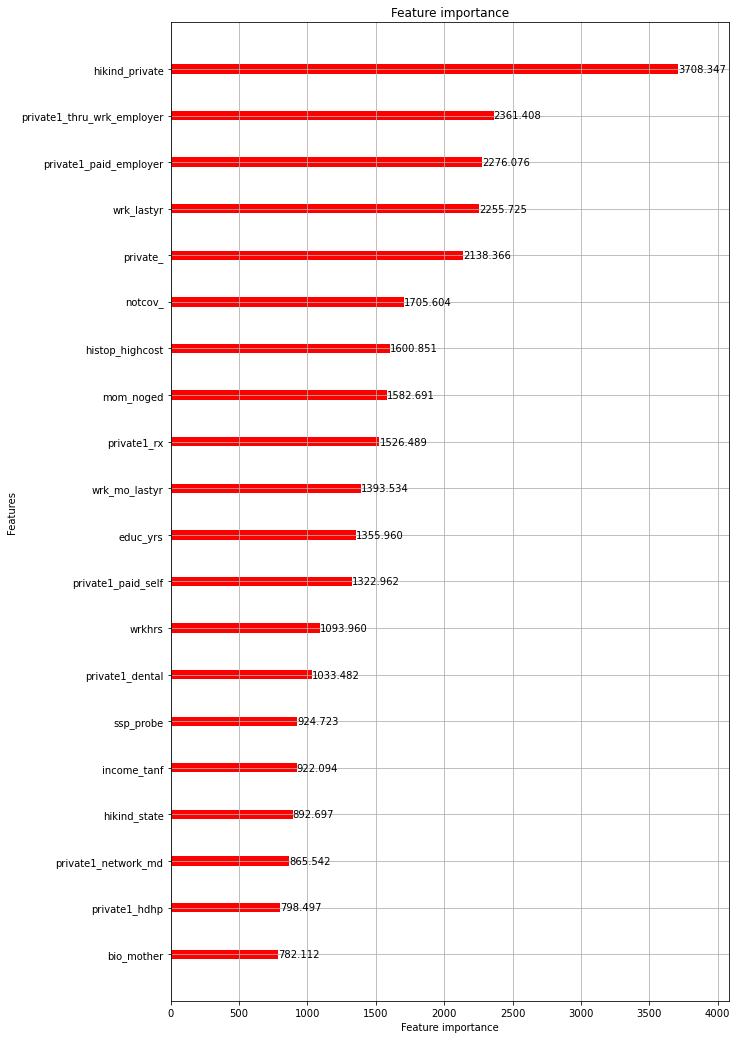

0.05587992925821658
0.007089030437727069
split:  1
[ 0.3391872   0.3871981   0.8330899  ...  0.40058607 -0.0186321
  0.18133715] [ 0.01570351 -0.09446925  0.21179861 ...  0.6803038   0.0848827
 -0.05692414]
mu trained and predicted
[LightGBM] [Info] [cross_entropy:Init]: (objective) labels passed interval [0, 1] check
[LightGBM] [Info] [cross_entropy:Init]: (metric) labels passed interval [0, 1] check
[LightGBM] [Info] [cross_entropy:Init]: sum-of-weights = 20466.000000
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.120708 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 864
[LightGBM] [Info] Number of data points in the train set: 20466, number of used features: 341
[LightGBM] [Info] [cross_entropy:BoostFromScore]: pavg = 0.169305 -> initscore = -1.590560
[LightGBM] [Info] Start training from score -1.590560
[LightGBM] [Warning] No 

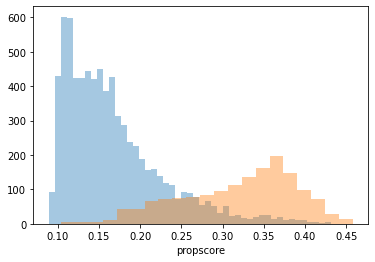

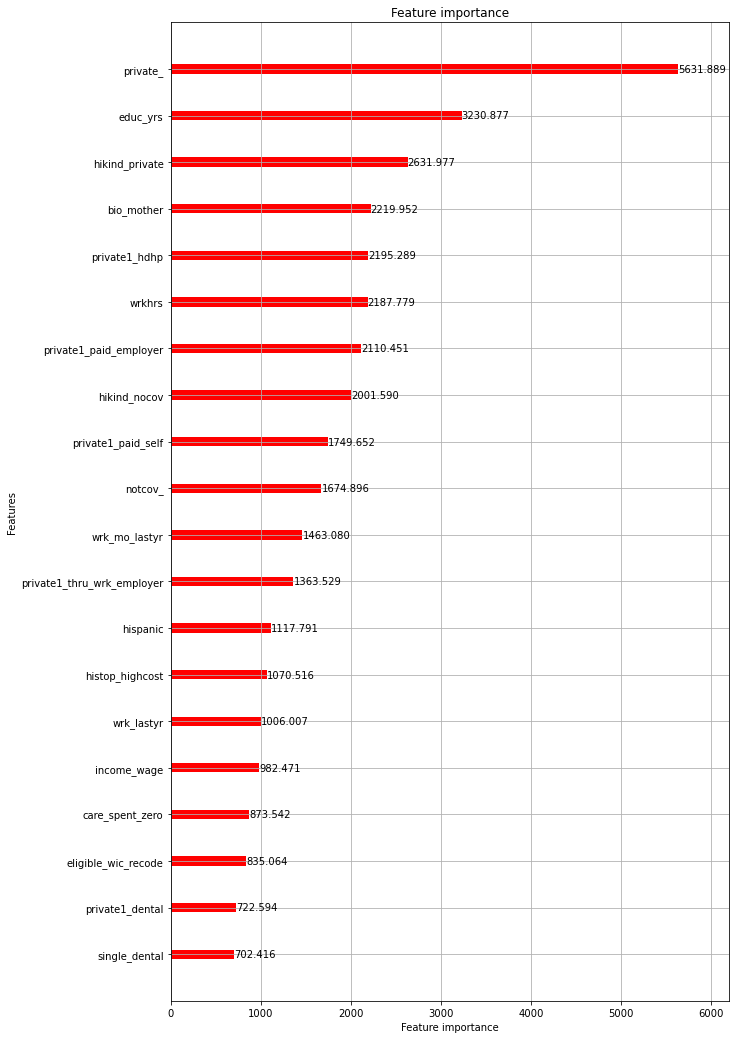

-0.01777884966264198
0.006703721817666064
split:  1
[-0.07077029  0.09134017  0.08882244 ...  0.03829025 -0.133265
  0.2158864 ] [-0.02792296 -0.09387366 -0.0141546  ... -0.05939133  0.3179676
 -0.06741792]
mu trained and predicted
[LightGBM] [Info] [cross_entropy:Init]: (objective) labels passed interval [0, 1] check
[LightGBM] [Info] [cross_entropy:Init]: (metric) labels passed interval [0, 1] check
[LightGBM] [Info] [cross_entropy:Init]: sum-of-weights = 19644.000000
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.115571 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 833
[LightGBM] [Info] Number of data points in the train set: 19644, number of used features: 325
[LightGBM] [Info] [cross_entropy:BoostFromScore]: pavg = 0.164630 -> initscore = -1.624171
[LightGBM] [Info] Start training from score -1.624171
[LightGBM] [Warning] No 

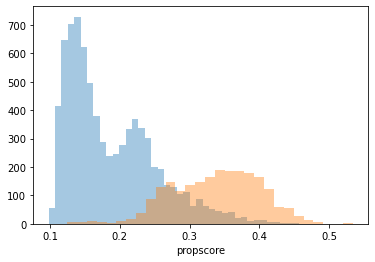

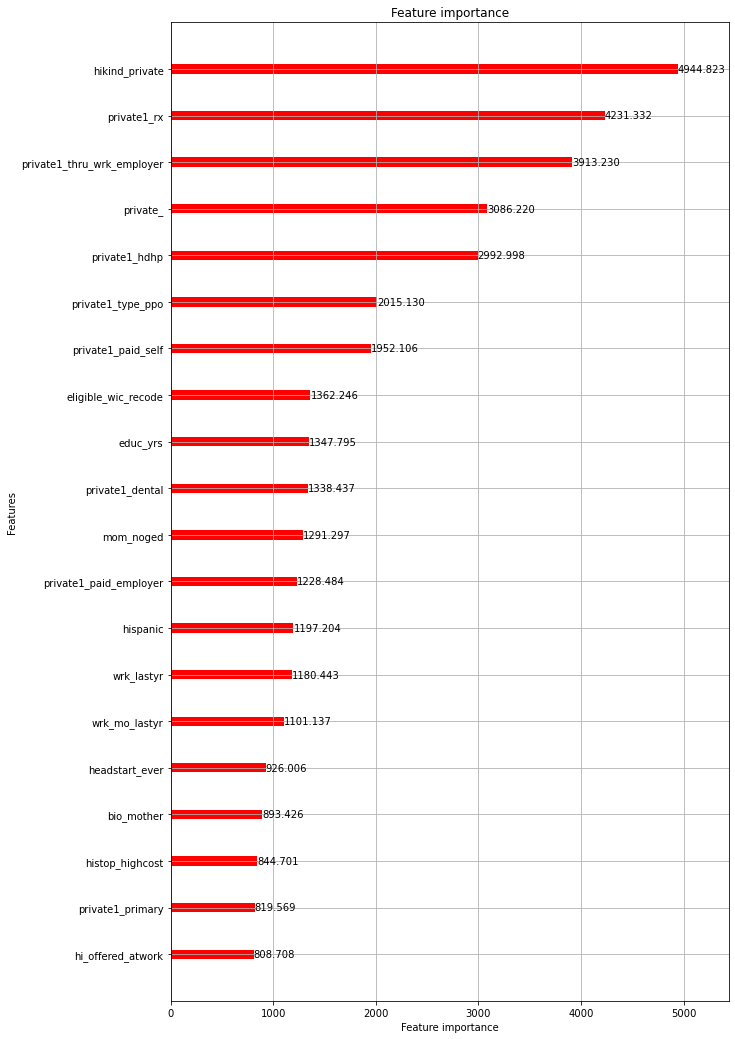

0.09257747421909182
0.006945897190755919
split:  1
[-0.02859478 -0.2729954   0.6484611  ...  0.35595104  0.69722736
  0.2870923 ] [0.00138934 0.42895454 0.02649962 ... 0.7474296  0.56906193 0.01820871]
mu trained and predicted
[LightGBM] [Info] [cross_entropy:Init]: (objective) labels passed interval [0, 1] check
[LightGBM] [Info] [cross_entropy:Init]: (metric) labels passed interval [0, 1] check
[LightGBM] [Info] [cross_entropy:Init]: sum-of-weights = 21932.000000
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.115960 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 862
[LightGBM] [Info] Number of data points in the train set: 21932, number of used features: 338
[LightGBM] [Info] [cross_entropy:BoostFromScore]: pavg = 0.195696 -> initscore = -1.413416
[LightGBM] [Info] Start training from score -1.413416
[LightGBM] [Warning] No furth

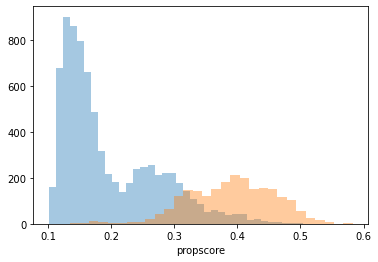

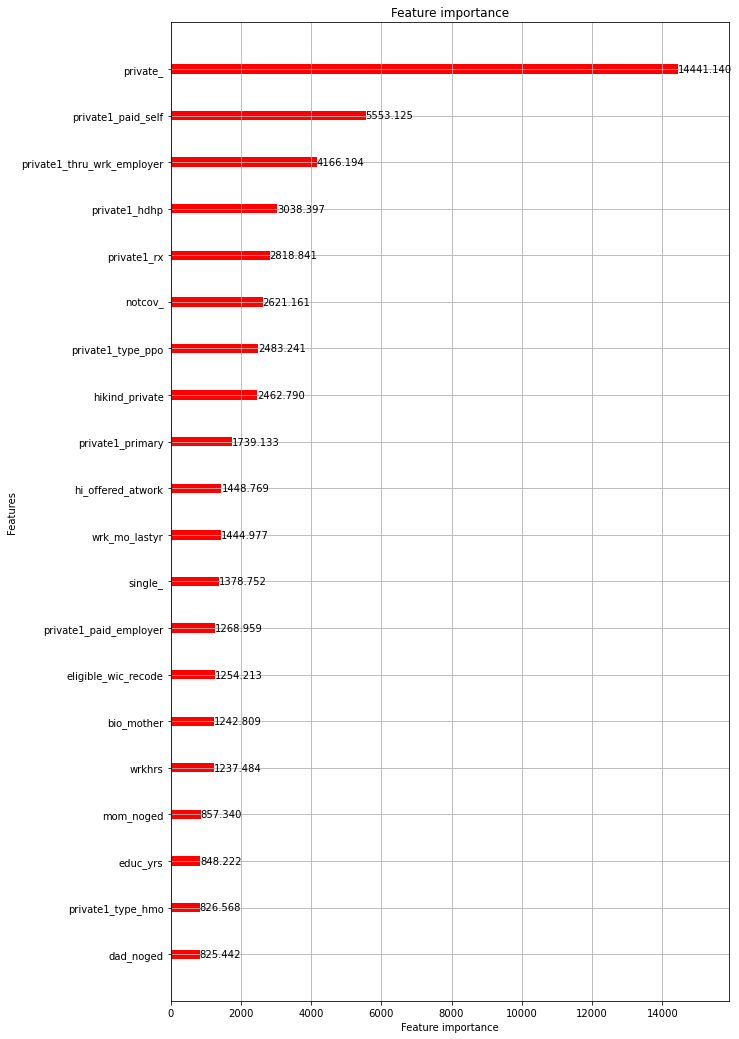

0.061605213755808456
0.006351569925634024
split:  1
[ 0.25110933  0.08817591  0.23507148 ... -0.01477651  0.33762017
 -0.1721647 ] [-0.10457769  0.45714074  0.40962508 ...  0.07558767  0.07674689
 -0.0720045 ]
mu trained and predicted
[LightGBM] [Info] [cross_entropy:Init]: (objective) labels passed interval [0, 1] check
[LightGBM] [Info] [cross_entropy:Init]: (metric) labels passed interval [0, 1] check
[LightGBM] [Info] [cross_entropy:Init]: sum-of-weights = 20408.000000
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.112507 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 854
[LightGBM] [Info] Number of data points in the train set: 20408, number of used features: 334
[LightGBM] [Info] [cross_entropy:BoostFromScore]: pavg = 0.220257 -> initscore = -1.264171
[LightGBM] [Info] Start training from score -1.264171
[LightGBM] [Warning] 

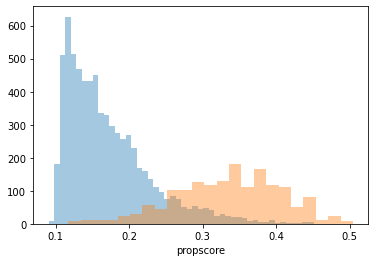

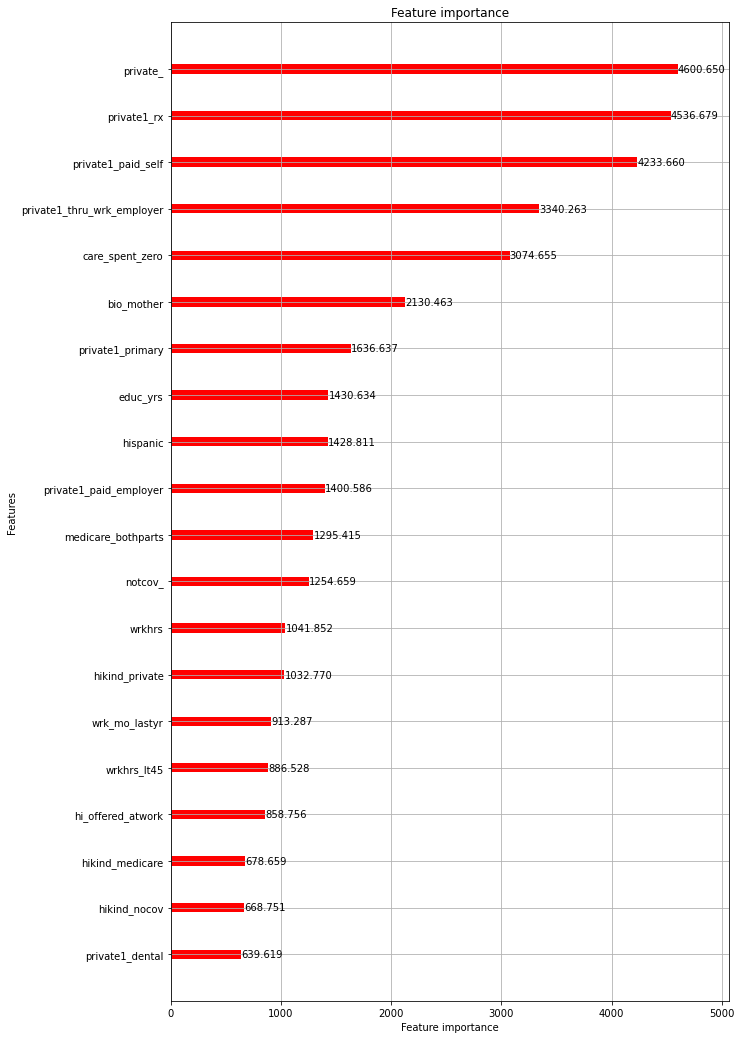

0.06080747429310198
0.0075243772315527965
split:  1
[-0.08182652  0.6041172   0.18805344 ...  0.11410447  0.6928816
  0.01312585] [ 0.2481574  -0.09587722  0.6630149  ...  0.22484232  0.3170941
  0.00185376]
mu trained and predicted
[LightGBM] [Info] [cross_entropy:Init]: (objective) labels passed interval [0, 1] check
[LightGBM] [Info] [cross_entropy:Init]: (metric) labels passed interval [0, 1] check
[LightGBM] [Info] [cross_entropy:Init]: sum-of-weights = 17463.000000
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.119828 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 808
[LightGBM] [Info] Number of data points in the train set: 17463, number of used features: 320
[LightGBM] [Info] [cross_entropy:BoostFromScore]: pavg = 0.187597 -> initscore = -1.465703
[LightGBM] [Info] Start training from score -1.465703
[LightGBM] [Warning] No

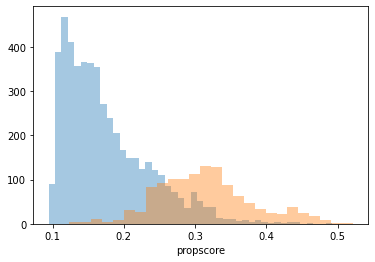

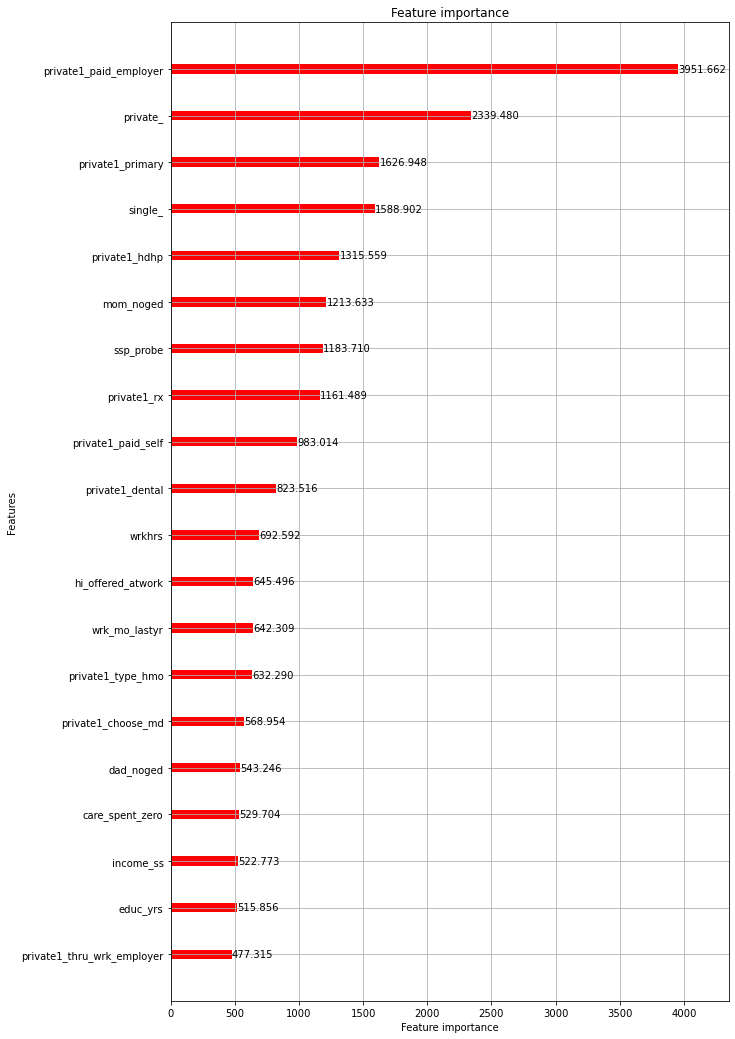

-0.025618021396440815
0.008717234303601565
split:  1
[ 0.01970295 -0.05175118  0.01377382 ...  0.14819859 -0.10815854
 -0.16508463] [ 0.16807438  0.26647368  0.31791285 ...  0.33616218  0.00659605
 -0.12489146]
mu trained and predicted
[LightGBM] [Info] [cross_entropy:Init]: (objective) labels passed interval [0, 1] check
[LightGBM] [Info] [cross_entropy:Init]: (metric) labels passed interval [0, 1] check
[LightGBM] [Info] [cross_entropy:Init]: sum-of-weights = 12572.000000
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.107425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 788
[LightGBM] [Info] Number of data points in the train set: 12572, number of used features: 314
[LightGBM] [Info] [cross_entropy:BoostFromScore]: pavg = 0.190025 -> initscore = -1.449845
[LightGBM] [Info] Start training from score -1.449845
[LightGBM] [Warning]

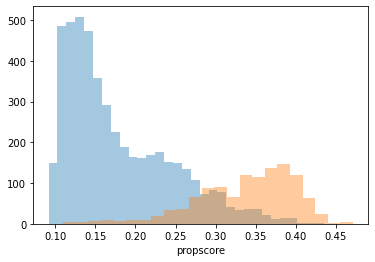

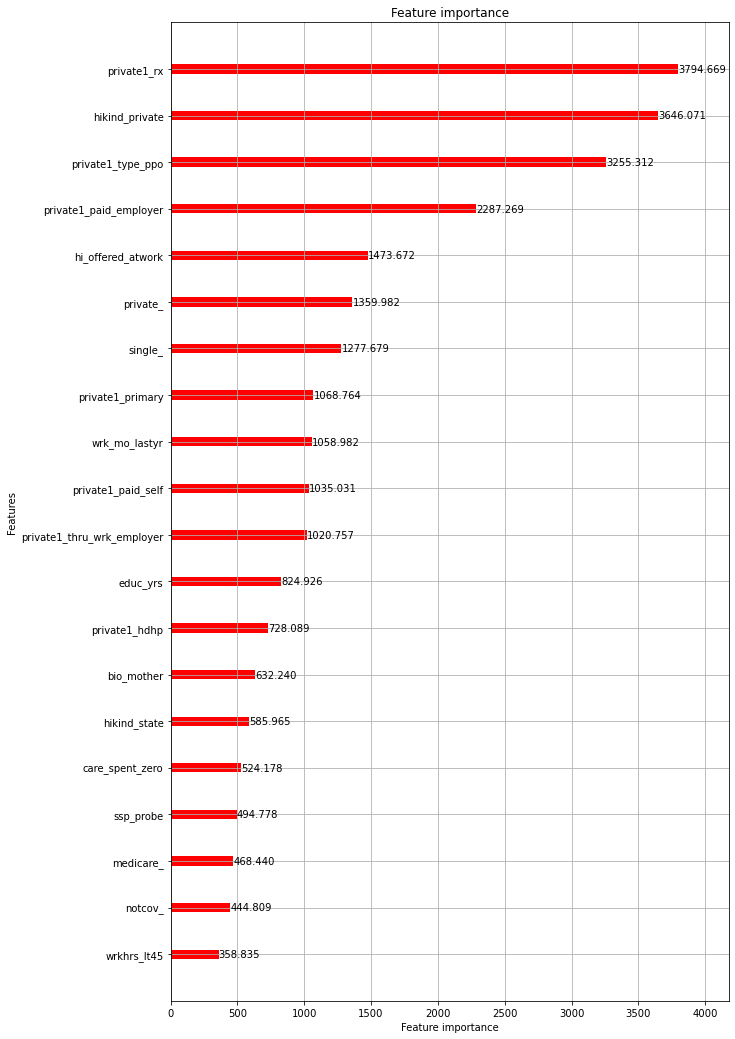

0.02898570204437587
0.008446664509364791
split:  1
[0.03299174 0.36328843 0.38695967 ... 0.5173317  0.04259154 0.53959835] [ 0.04469898  0.10974065  0.11708616 ...  0.21139227 -0.10199277
  0.1047703 ]
mu trained and predicted
[LightGBM] [Info] [cross_entropy:Init]: (objective) labels passed interval [0, 1] check
[LightGBM] [Info] [cross_entropy:Init]: (metric) labels passed interval [0, 1] check
[LightGBM] [Info] [cross_entropy:Init]: sum-of-weights = 12146.000000
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.108915 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 779
[LightGBM] [Info] Number of data points in the train set: 12146, number of used features: 319
[LightGBM] [Info] [cross_entropy:BoostFromScore]: pavg = 0.195785 -> initscore = -1.412852
[LightGBM] [Info] Start training from score -1.412852
[LightGBM] [Warning] No furth

In [11]:
alpha_range = [.2,.3,.4,.5,.6,.7,.8,.9,1.0]
wte_store = {}
ate_store = {}
df_hte = {}
for yr in range(2008,2019):
    ate_store[yr] = {}
    wte_store[yr] = {}
    for r in ['region_west']:

        train,test = train_test_split(df[yr][(df[yr][r]==1)&(df[yr]['meligible']==1)], test_size=.33, random_state=42)

        x = X
        d = 'medicaid_'
        y = 'care_office_2wks'

        model1 = model(); model0 = model(); 
        model_p = model(); model_p.model_class = 'rf'
        model1.train(train[train[d]==1],x,y, args=args_nhis['gbdt'])
        model0.train(train[train[d]==0],x,y, args=args_nhis['gbdt'])
        mu1 = model1.predict(test)
        mu0 = model0.predict(test)
        model_p.train(train,x,d,args =args_nhis['rf'])
        p = model_p.predict(test)

        test = pd.concat([test.reset_index(drop=True),pd.Series(p,name='propscore')],axis=1)
        for i in [0,1]:
            sns.distplot(test[test[d]==i]['propscore'],kde=False)
        plt.show();plt.close()
        lgb.plotting.plot_importance(model_p.model, max_num_features=20,importance_type='gain', ignore_zero=False, figsize=(10,18), color = 'r')

        aipw = (mu1-mu0) + (test[d]/p)*(test[y]-mu1) - ((1-test[d])/(1-p))*(test[y]-mu0)
        sns.distplot(aipw,kde=False)
        plt.show()
        ate_store[yr][r] = [aipw.mean(), np.power(aipw.var()/test.shape[0],1/2)]
        print(aipw.mean())
        print(np.power(aipw.var()/test.shape[0],1/2))

        
        models = {}
        models['model1_h'] = model(); models['model1_h'].model_class= 'gbdt'
        models['model0_h'] = model(); models['model0_h'].model_class= 'gbdt'
        models['model1'] = model(); models['model1'].model_class= 'gbdt'
        models['model0'] = model(); models['model0'].model_class= 'gbdt'
        models['model_p'] = model(); models['model_p'].model_class='rf'
        args={'args_mu': args_nhis['gbdt'], 'args_p':args_nhis['rf']}
        wte_store[yr][r] = wte(df[yr][df[yr][r]==1],y,d,x,alpha_range,K=3,split=1,
                               models=models, args=args,pos=1)
                
        
        test['aipw'] = aipw
        test['mu1'] = mu1
        test['mu0']= mu0
        test['p'] = p
        df_hte[yr] = test
        

In [12]:
dfg = pd.DataFrame()
for r in ['region_west']:
    for yr in range(2008,2019):
        #dfg = dfg.append({'region':r, 
        #                  'ate_est':ate_store[yr][r][0],
        #                  'ate_std': ate_store[yr][r][1],
        #                  'year':yr},ignore_index=True)
        for a in alpha_range:
            dfg = dfg.append({'region':r, 
                              'alpha':str(a),
                              'wte_est':wte_store[yr][r][0][a],
                              'wte_std': wte_store[yr][r][1][a],
                              'year':str(yr)},ignore_index=True)

In [13]:
pd.set_option('max_rows',None)
dfg['wte_ub'] = dfg['wte_est'] + 1.96*dfg['wte_std']
dfg['wte_lb'] = dfg['wte_est'] - 1.96*dfg['wte_std']

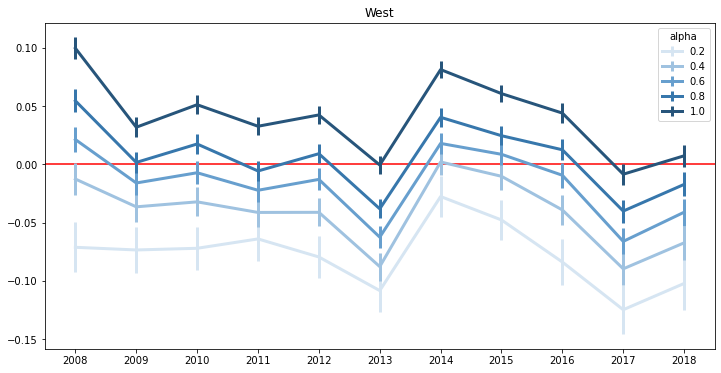

In [14]:
plt.figure(figsize=(12, 6))
plt.hlines(0, -10, 15, colors='red')

plt.errorbar(dfg[(dfg.region=='region_west')&(dfg.alpha=='0.2')]['year'],
             dfg[(dfg.region=='region_west')&(dfg.alpha=='0.2')]['wte_est'],
             yerr = 1.96*dfg[(dfg.region=='region_west')&(dfg.alpha=='0.2')]['wte_std'],
             color='#d6e5f2',
            linewidth=3.0,
            label = '0.2')

plt.errorbar(dfg[(dfg.region=='region_west')&(dfg.alpha=='0.4')]['year'],
             dfg[(dfg.region=='region_west')&(dfg.alpha=='0.4')]['wte_est'], 
             yerr = 1.96*dfg[(dfg.region=='region_west')&(dfg.alpha=='0.4')]['wte_std'],
              linewidth = 3.0,
              color='#9fc2e0',
            label = '0.4')


plt.errorbar(dfg[(dfg.region=='region_west')&(dfg.alpha=='0.6')]['year'],
             dfg[(dfg.region=='region_west')&(dfg.alpha=='0.6')]['wte_est'],
                yerr = 1.96*dfg[(dfg.region=='region_west')&(dfg.alpha=='0.6')]['wte_std'],
              linewidth = 3.0,
              color='#679fce',
            label = '0.6')


plt.errorbar(dfg[(dfg.region=='region_west')&(dfg.alpha=='0.8')]['year'],
             dfg[(dfg.region=='region_west')&(dfg.alpha=='0.8')]['wte_est'],
            yerr = 1.96*dfg[(dfg.region=='region_west')&(dfg.alpha=='0.8')]['wte_std'],
              linewidth = 3.0,
              color='#3777ac',
            label = '0.8')

plt.errorbar(dfg[(dfg.region=='region_west')&(dfg.alpha=='1.0')]['year'],
             dfg[(dfg.region=='region_west')&(dfg.alpha=='1.0')]['wte_est'],
            yerr = 1.96*dfg[(dfg.region=='region_west')&(dfg.alpha=='1.0')]['wte_std'],
              linewidth = 3.0,
              color='#27557b',
            label = '1.0')
plt.title('West');plt.legend(title='alpha');plt.show();plt.close()


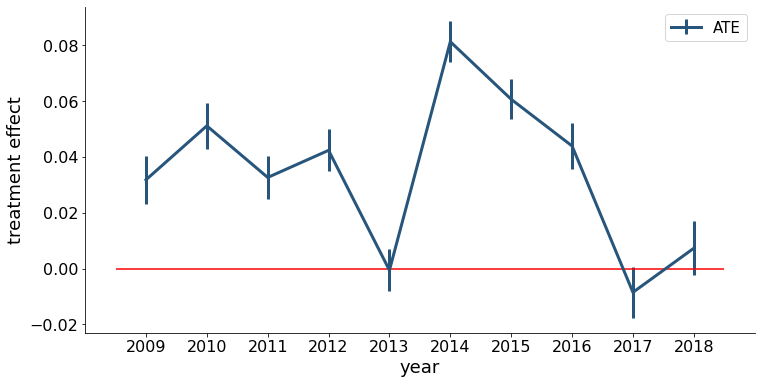

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.errorbar(dfg[(dfg.year.astype('int')>2008)&(dfg.region=='region_west')&(dfg.alpha=='1.0')]['year'],
             dfg[(dfg.year.astype('int')>2008)&(dfg.region=='region_west')&(dfg.alpha=='1.0')]['wte_est'],
            yerr = 1.96*dfg[(dfg.year.astype('int')>2008)&(dfg.region=='region_west')&(dfg.alpha=='1.0')]['wte_std'],
              linewidth = 3.0,
              color='#27557b',
            label = '1.0')
plt.legend(['ATE'],fontsize=15);
plt.hlines(0, -.5,9.5, colors='red')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('year', fontsize=18)
plt.ylabel('treatment effect',fontsize=18)
plt.show();plt.close()

Text(8.22, -0.076, 'WTE$_{\\alpha}$ 95% CI')

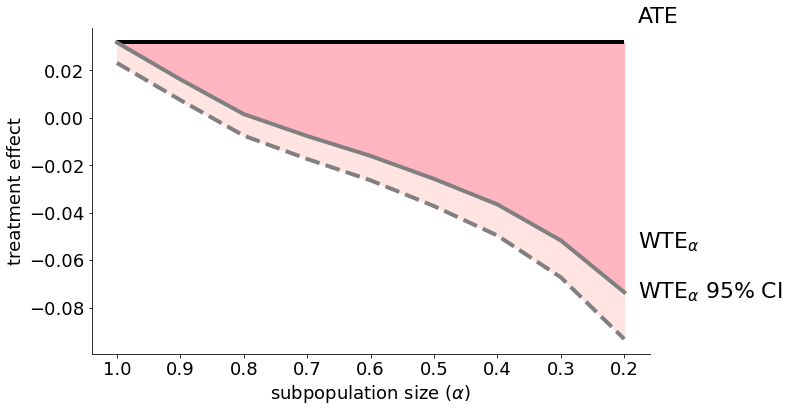

In [16]:
dfg  = dfg.sort_values(['alpha'],ascending=False)
fig, ax = plt.subplots(figsize=(10, 6))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.hlines(dfg[(dfg.region=='region_west')&(dfg.year=='2009')&(dfg.alpha=='1.0')]['wte_est'].values[0], 0, 8, colors='black',linewidth=4)
plt.plot(dfg[(dfg.region=='region_west')&(dfg.year=='2009')]['alpha'],dfg[(dfg.region=='region_west')&(dfg.year=='2009')]['wte_est'], linewidth=4, color='gray')
plt.plot(dfg[(dfg.region=='region_west')&(dfg.year=='2009')]['alpha'],dfg[(dfg.region=='region_west')&(dfg.year=='2009')]['wte_lb'], linewidth = 4, color='gray',linestyle='dashed')

ax.fill_between(dfg[(dfg.region=='region_west')&(dfg.year=='2009')]['alpha'], 
                dfg[(dfg.region=='region_west')&(dfg.year=='2009')]['wte_est'], 
                dfg[(dfg.region=='region_west')&(dfg.year=='2009')]['wte_lb'],
               color='mistyrose')

ax.fill_between(dfg[(dfg.region=='region_west')&(dfg.year=='2009')]['alpha'], 
                dfg[(dfg.region=='region_west')&(dfg.year=='2009')]['wte_est'], 
                dfg[(dfg.region=='region_west')&(dfg.year=='2009')&(dfg.alpha=='1.0')]['wte_est'].values[0],
               color='lightpink')

plt.xlabel(r"subpopulation size ($\alpha$)", fontsize=18)
plt.ylabel('treatment effect',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.text(8.22, 0.04, 'ATE', fontsize = 22)
plt.text(8.22, -0.055, r'WTE$_{\alpha}$', fontsize = 22)
plt.text(8.22, -0.076, r'WTE$_{\alpha}$ 95% CI', fontsize = 22)



region_west 2013
region_west 2018


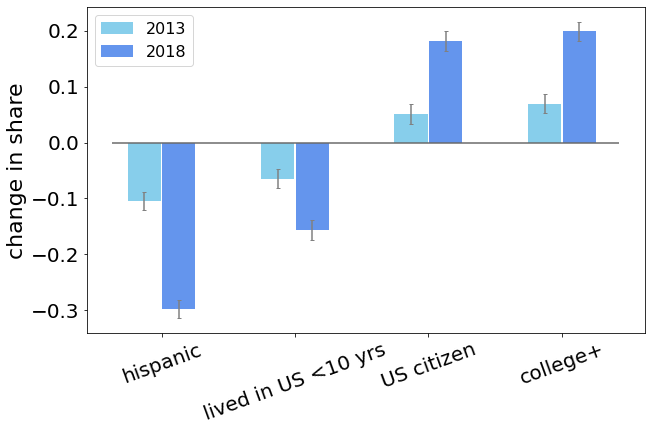

In [17]:
import statsmodels.api as sm
results_dict = {}
xs = ['yrs_us_lt10','us_citizen','hispanic','educ_colplus']
for r in ['region_west']:
    results_dict[r] = {}
    for y in [2013,2018]:
        dft = df[2009].append(df[y])
        dft = dft[dft[r]==1]
        print(r,y)

        dft['year_not_2009']  = dft.year==y
        t = 'year_not_2009'

        dft['cons']=1

        res_ols = []
        for xvar in xs:
            dft[xvar] = (dft[xvar] - dft[xvar].mean())/dft[xvar].std()

            mod_ols = sm.WLS( dft[xvar].astype('float'),dft[[t,'cons']].astype('float'), weights=1)
            res_o = mod_ols.fit()
            #print(res_o.summary())
            res_ols.append(res_o.summary())

            results = pd.DataFrame()
        for i in range(len(res_ols)):
            results = results.append({'name': res_ols[i].tables[0].data[0][1] ,
                                 'coef': res_ols[i].tables[1].data[1][1],
                                 'lb': res_ols[i].tables[1].data[1][5],
                                 'ub':res_ols[i].tables[1].data[1][6],
                                 'weight':0}, ignore_index=True)
        results = results[~((results['coef']==0) & (results['ub']==0))]
        for v in ['coef','lb','ub']:
            results[v] = results[v].astype('float')
        results['error'] = results['coef'] - results['lb']
        results = results.sort_values(by='coef')
        results_dict[r][y] = results

    y = 2013
    results_dict[r][2013]['year'] = 2013
    results_dict[r][2018]['year'] = 2018
    rd = results_dict[r][2013].append(results_dict[r][2018])
    rd = rd[rd['name'].isin(xs)]
    rd['error'] = rd['coef'] - rd['lb']

    c1 = 'skyblue'; c2= 'cornflowerblue'
    width1 = 7/27
    fig,ax = plt.subplots(figsize=(10,6))
    plt.hlines(0,-.5,3.3, colors='dimgray',label='_nolegend_') # ATE line

    ax.bar([0-width1,1-width1,2-width1,3-width1],rd[rd.year==2013]['coef'],width=1/4, color=c1)
    ax.bar([0,1,2,3],rd[rd.year==2018]['coef'],width=1/4, color=c2)

    ax.errorbar([0-width1,1-width1,2-width1,3-width1],rd[rd.year==2013]['coef'],rd[rd.year==2013]['error'],fmt='none',ecolor='gray',capsize=2)
    ax.errorbar([0,1,2,3],rd[rd.year==2018]['coef'],rd[rd.year==2013]['error'],fmt='none',ecolor='gray',capsize=2)


    plt.xticks([0-width1/2,1-width1/2,2-width1/2,3-width1/2], ['hispanic','lived in US <10 yrs', 'US citizen', 'college+'],fontsize=20, rotation=20); plt.yticks(fontsize=20)
    plt.ylabel('change in share', fontsize=22)
    plt.legend(['2013','2018'],fontsize=16)
    plt.show()

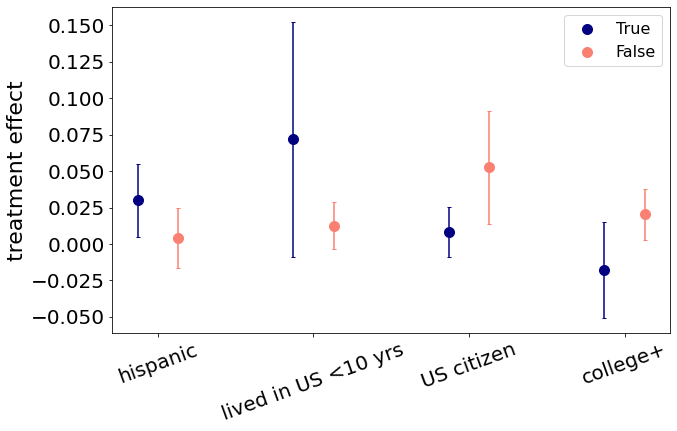

In [18]:
dfw = df_hte[2009]
_df_hte = pd.DataFrame()
xs = ['hispanic','yrs_us_lt10','us_citizen','educ_colplus']
for v in xs:
    for t in [True, False]:
        _df_hte = _df_hte.append({'name':v,
                               'tf':t,
                               'mean':dfw[dfw[v]==t]['aipw'].mean(),
                               'std':np.sqrt(dfw[dfw[v]==t]['aipw'].var()/dfw[dfw[v]==t].shape[0]),
                               'error':1.96*np.sqrt(dfw[dfw[v]==t]['aipw'].var()/dfw[dfw[v]==t].shape[0])},
                              ignore_index=True)

width1 = 7/27
c1 = 'navy';c2='salmon'
fig,ax = plt.subplots(figsize=(10,6))
ax.scatter([0-width1,1-width1,2-width1,3-width1],_df_hte[_df_hte.tf==1]['mean'],marker='o',s=100,c=c1)
ax.scatter([0,1,2,3],_df_hte[_df_hte.tf==0]['mean'],marker='o',s=100,c=c2)

ax.errorbar([0-width1,1-width1,2-width1,3-width1],_df_hte[_df_hte.tf==1]['mean'],_df_hte[_df_hte.tf==1]['error'],fmt='none',ecolor=c1,capsize=2)
ax.errorbar([0,1,2,3],_df_hte[_df_hte.tf==0]['mean'],_df_hte[_df_hte.tf==0]['error'],fmt='none',ecolor=c2,capsize=2)

plt.xticks([0-width1/2,1-width1/2,2-width1/2,3-width1/2], ['hispanic','lived in US <10 yrs', 'US citizen', 'college+'],fontsize=20, rotation=20); plt.yticks(fontsize=20)
plt.ylabel('treatment effect', fontsize=22)
plt.legend(['True','False'],fontsize=16)

plt.show()


('hispanic', 'us_citizen', 'educ_colplus')


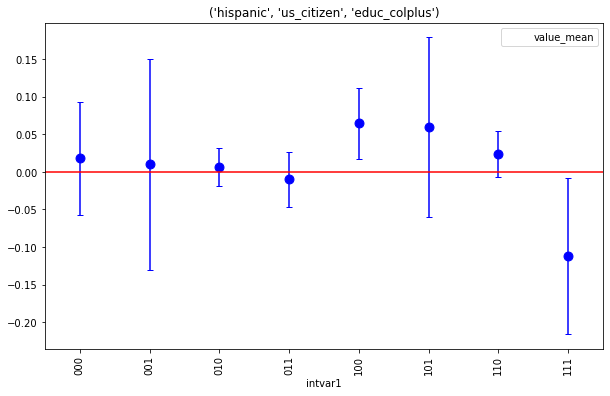

In [19]:
# make combinations of variables

from itertools import combinations


intvars_total = ['hispanic','us_citizen','educ_colplus']
dfw = dfw.reset_index()
cc = list(combinations(intvars_total,3))
ctr = 1
for comb in cc:
    dfw['intvar'+str(ctr)] = '000'
    for a in [0,1]:
        for b in [0,1]:
            for c in [0,1]:
                dfw.loc[(dfw[comb[0]]==a)&(dfw[comb[1]]==b)&(dfw[comb[2]]==c),'intvar'+str(ctr)]=str(a)+str(b)+str(c)
    df_g = pd.melt(dfw, id_vars=['index','intvar'+str(ctr)], value_vars=['aipw'])
    #get value counts
    df_g = df_g.merge(df_g[df_g.variable=='aipw']['intvar'+str(ctr)].value_counts().reset_index(), right_on='index', left_on='intvar'+str(ctr),how='left',validate='many_to_one')
    df_g['count'] = 1
    dft = df_g.groupby(['intvar'+str(ctr)+'_x']).agg({'value':['mean','var'],'count':['sum']}).reset_index()
    dft.columns = dft.columns.get_level_values(0) + '_' + dft.columns.get_level_values(1)
    dft = dft.rename(columns = {'intvar'+str(ctr)+'_x_': 'intvar'+str(ctr)})
    dft = dft[dft.count_sum > 5]
    dft['value_err'] = 1.96*np.sqrt(dft['value_var']/dft['count_sum']) 
    print(comb)
    fig,ax = plt.subplots(figsize=(10,6))
    dft.plot(x='intvar'+str(ctr),y='value_mean',kind='bar',capsize=3,yerr='value_err',color='None',ax=ax,ecolor='blue')
    ax.scatter(x=pd.np.arange(dft.shape[0]), marker = 'o', s=80, y = dft['value_mean'], color='blue')
    plt.axhline(y=0, color='r', linestyle='-')
    plt.title(comb)
    plt.xticks(rotation=90)
    #plt.savefig("../graphs/intvar_n2/intvar"+str(ctr)+".png",bbox_inches='tight')
    plt.show()
    ctr +=1



In [20]:

dft = dft[dft.intvar1.isin(['001','011','110','111'])]
dft.head()

,intvar1,value_mean,value_var,count_sum,value_err
1,001,0.010156,0.473919,92,0.140674
3,011,-0.010037,0.255095,738,0.036440
6,110,0.023753,0.525834,2165,0.030546
7,111,-0.111496,0.329614,117,0.104032


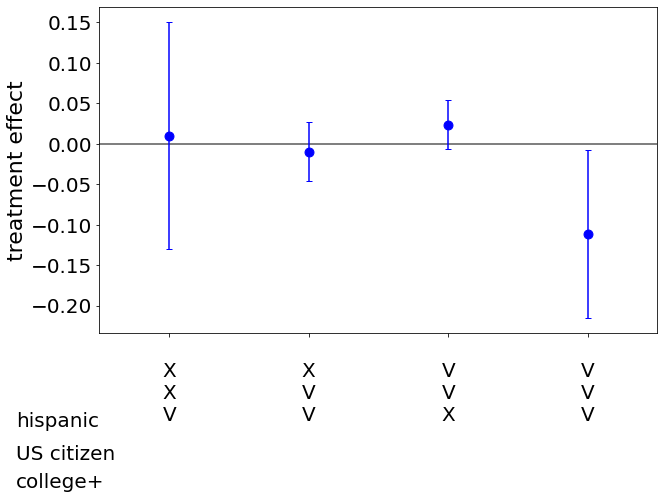

In [21]:

dft['xtick'] = ''
dft.loc[dft.intvar1=='001','xtick'] = '\nX\nX\nV'
dft.loc[dft.intvar1=='011','xtick'] = '\nX\nV\nV'
dft.loc[dft.intvar1=='110','xtick'] = '\nV\nV\nX'
dft.loc[dft.intvar1=='111','xtick'] = '\nV\nV\nV'

fig,ax = plt.subplots(figsize=(10,6))
plt.hlines(0,-0.5,3.5,color='gray',linewidth = 2)
dft.plot(x='xtick',y='value_mean',kind='bar',capsize=3,yerr='value_err',color='None',ax=ax,ecolor='blue')
ax.scatter(x=pd.np.arange(dft.shape[0]), marker = 'o', s=80, y = dft['value_mean'], color='blue')
plt.xticks(rotation=0, fontsize=20)
plt.yticks(fontsize=20)
ax.legend().set_visible(False)

plt.ylabel('treatment effect', fontsize=22)
plt.xlabel('')

plt.text(-1.1, -0.35, 'hispanic', fontsize = 20)
plt.text(-1.1, -0.39, 'US citizen', fontsize = 20)
plt.text(-1.1, -0.425, 'college+', fontsize = 20)

plt.show()